# Practicel ML - KNN

### Full Name : mohamad hosein mehdikhani
### Student Number : 400102039

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Inspect the first rows of the dataframe

In [ ]:
dataset = pd.read_csv('train.csv')


print(dataset.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 7          3  Life Sciences              1            1883   
1                 1          4  Life Sciences              1            1585   
2                 3          3          Other              1            1478   
3                 9          3      Marketing              1            1965   
4                10          3      Marketing              1             722   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                        

Calculate the number of samples

In [ ]:
num_samples = dataset.shape[0]
print("Number of samples:", num_samples+1)

Number of samples: 1103


Measure the number of unique values for each column. Note that Attrition is the target column.

In [31]:

unique_values = dataset.nunique()
print(unique_values)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [ ]:

columns_to_remove = unique_values[unique_values < 2].index
dataset_cleaned = dataset.drop(columns=columns_to_remove)

print("Columns removed:", columns_to_remove)
print("Dataset shape after removing columns with less than two unique values:", dataset_cleaned.shape)


Columns removed: Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')
Dataset shape after removing columns with less than two unique values: (1102, 32)


Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [ ]:
# handle uniqueness

# TODO

In [ ]:

business_travel_encoded = pd.get_dummies(dataset_cleaned['BusinessTravel'], prefix='BusinessTravel')


dataset_encoded = pd.concat([dataset_cleaned, business_travel_encoded], axis=1)


mean_age_by_travel = dataset_encoded.groupby('BusinessTravel')[['Age']].mean().reset_index()
print(mean_age_by_travel,)

      BusinessTravel        Age
0         Non-Travel  35.971698
1  Travel_Frequently  36.539906
2      Travel_Rarely  37.065134


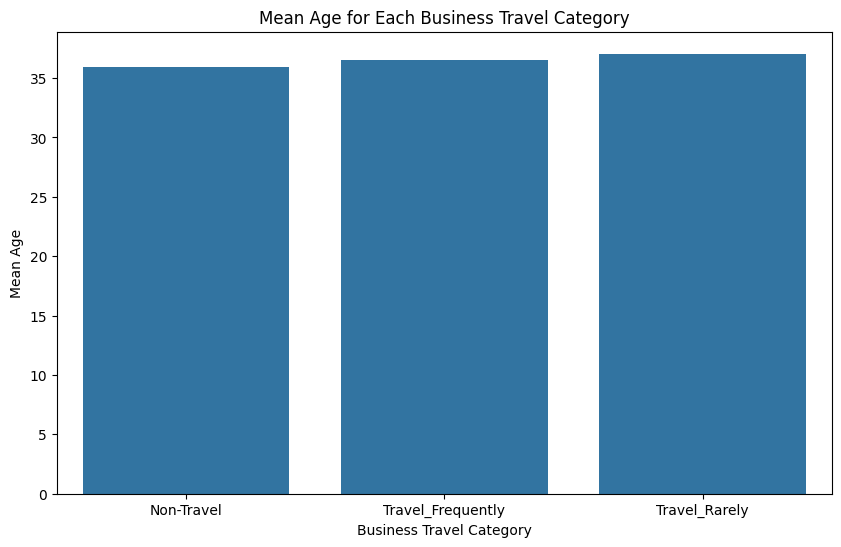

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(data=mean_age_by_travel, x='BusinessTravel', y='Age')
plt.xlabel('Business Travel Category')
plt.ylabel('Mean Age')
plt.title('Mean Age for Each Business Travel Category')
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

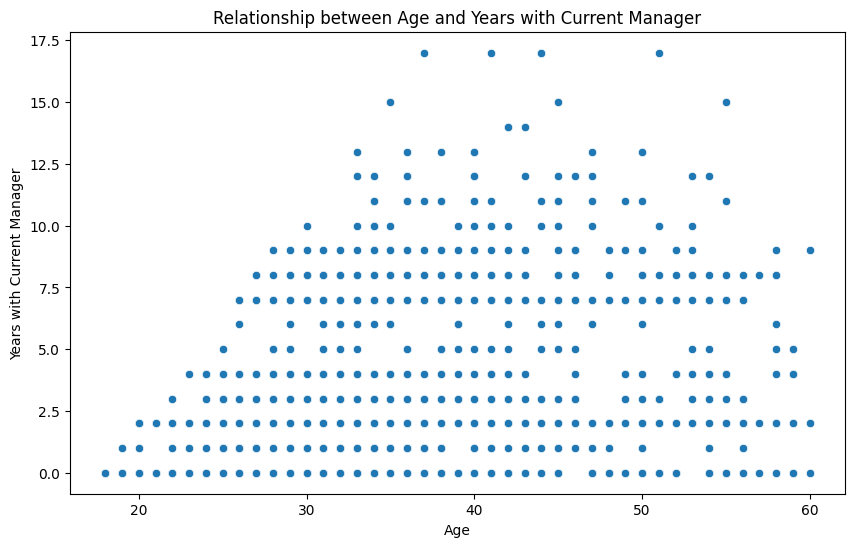

In [ ]:


if 'Age' in dataset_cleaned.columns and 'YearsWithCurrManager' in dataset_cleaned.columns:

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=dataset_cleaned, x='Age', y='YearsWithCurrManager')
    plt.xlabel('Age')
    plt.ylabel('Years with Current Manager')
    plt.title('Relationship between Age and Years with Current Manager')
    plt.show()
else:
    print("'Age' or 'YearsWithCurrManager' column not found in the dataset.")

It seems that old are more likely to change their manager.the plot should be y=x+b for every age=b so for bigger b's we have more lost points in the plot so they have quit or retired already. (added by the 400102039 mohamad hosein mehdikhani)

Plot the average MonthlyIncome against the YearsAtCompany.

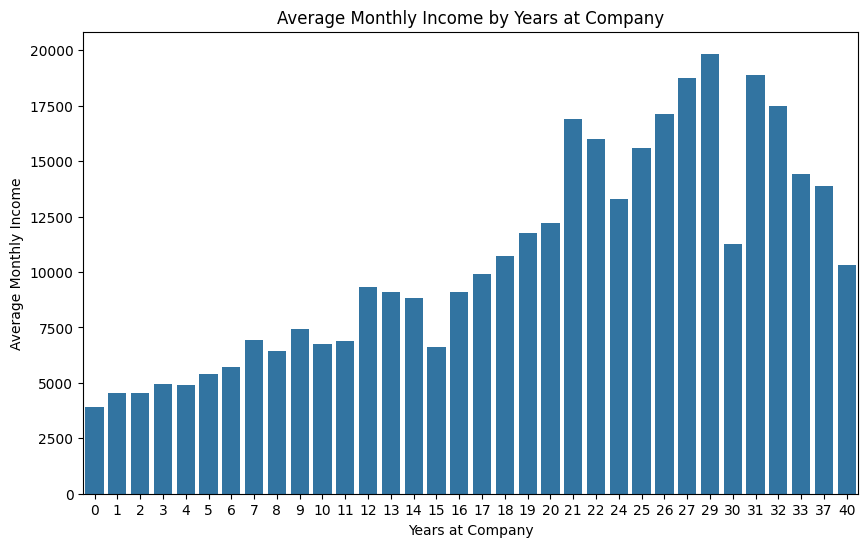

In [ ]:

if 'MonthlyIncome' in dataset_cleaned.columns and 'YearsAtCompany' in dataset_cleaned.columns:

    mean_income_by_years = dataset_cleaned.groupby('YearsAtCompany')['MonthlyIncome'].mean().reset_index()


    plt.figure(figsize=(10, 6))
    sns.barplot(data=mean_income_by_years, x='YearsAtCompany', y='MonthlyIncome')
    plt.xlabel('Years at Company')
    plt.ylabel('Average Monthly Income')
    plt.title('Average Monthly Income by Years at Company')
    plt.show()
else:
    print("'MonthlyIncome' or 'YearsAtCompany' column not found in the dataset.")

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [32]:

label_encoders = {}
for column in dataset_cleaned.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    dataset_cleaned[column] = le.fit_transform(dataset_cleaned[column])
    label_encoders[column] = le


In [ ]:

target_column = 'Attrition'
X = dataset_cleaned.drop(columns=target_column)
y = dataset_cleaned[target_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (704, 31)
Validation set shape: (177, 31)
Test set shape: (221, 31)


In [ ]:

print("Length of training set (X_train):", len(X_train))
print("Length of validation set (X_val):", len(X_val))
print("Length of training labels (y_train):", len(y_train))
print("Length of validation labels (y_val):", len(y_val))

Length of training set (X_train): 704
Length of validation set (X_val): 177
Length of training labels (y_train): 704
Length of validation labels (y_val): 177


Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [33]:

X_val_features = X_val.copy()
y_val_labels = y_val.copy()


X_test_features = X_test.copy()
y_test_labels = y_test.copy()

print("Validation features shape:", X_val_features.shape)
print("Validation labels shape:", y_val_labels.shape)
print("Test features shape:", X_test_features.shape)
print("Test labels shape:", y_test_labels.shape)

Validation features shape: (177, 31)
Validation labels shape: (177,)
Test features shape: (221, 31)
Test labels shape: (221,)



# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [ ]:
class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        predicted_labels = [self._predict(x) for x in X_test]
        return np.array(predicted_labels)

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """

        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]


        k_indices = np.argsort(distances)[:self.k]


        k_nearest_labels = [self.y_train[i] for i in k_indices]


        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


knn = KNN(k=3)


knn.fit(X_train.values, y_train.values)

predictions = knn.predict(X_val.values)


print(predictions)


[0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]



# Evaluation
  

Define the model and train it.

In [34]:

knn = KNN(k=3)


knn.fit(X_train.values, y_train.values)


val_predictions = knn.predict(X_val.values)


val_accuracy = np.mean(val_predictions == y_val.values)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


test_predictions = knn.predict(X_test.values)


test_accuracy = np.mean(test_predictions == y_test.values)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Validation Accuracy: 76.84%
Test Accuracy: 79.19%


Predict the y_train and y_test values.

In [35]:

train_predictions = knn.predict(X_train.values)


test_predictions = knn.predict(X_test.values)


print("Predicted labels for training set:", train_predictions)
print("Predicted labels for test set:", test_predictions)

Predicted labels for training set: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 

# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [36]:

from sklearn.neighbors import KNeighborsClassifier


k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)


knn_model.fit(X_train, y_train)


print("KNN Model trained successfully with sklearn!")


train_predictions_sklearn = knn_model.predict(X_train)


test_predictions_sklearn = knn_model.predict(X_test)


print("Predicted labels for training set (sklearn):", train_predictions_sklearn)
print("Predicted labels for test set (sklearn):", test_predictions_sklearn)

train_accuracy_sklearn = np.mean(train_predictions_sklearn == y_train)
print(f'Sklearn Training Accuracy: {train_accuracy_sklearn * 100:.2f}%')


test_accuracy_sklearn = np.mean(test_predictions_sklearn == y_test)
print(f'Sklearn Test Accuracy: {test_accuracy_sklearn * 100:.2f}%')

KNN Model trained successfully with sklearn!
Predicted labels for training set (sklearn): [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1

Now predict the defined model on test data and return the accuracy

In [ ]:

from sklearn.metrics import accuracy_score


y_pred = knn_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7918552036199095


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**